<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Smart_Portfolio_Performance_Using_GBM_with_Trend_Confirmation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


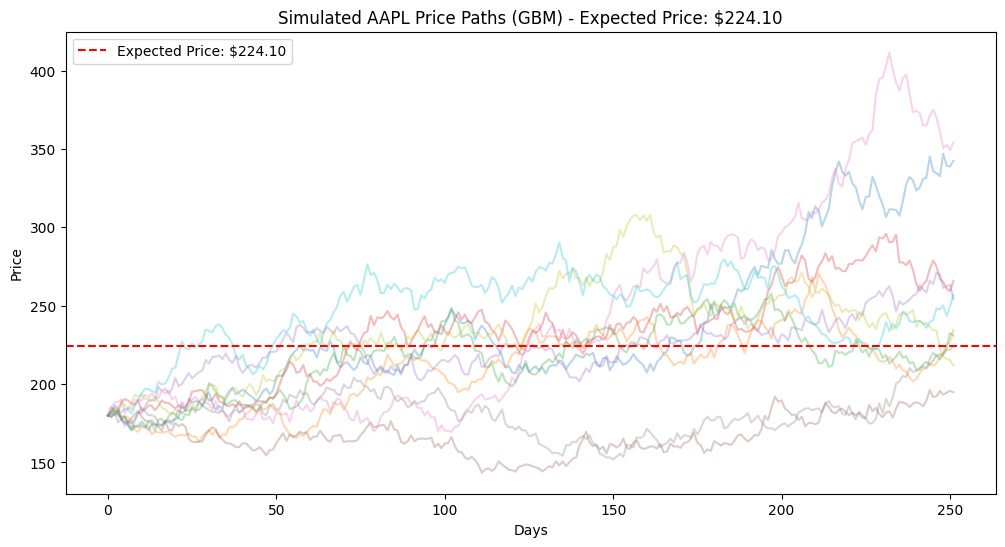

Initial Capital: $10,000.00
Final Portfolio Value: $12,456.73
Total ROI: 24.57%


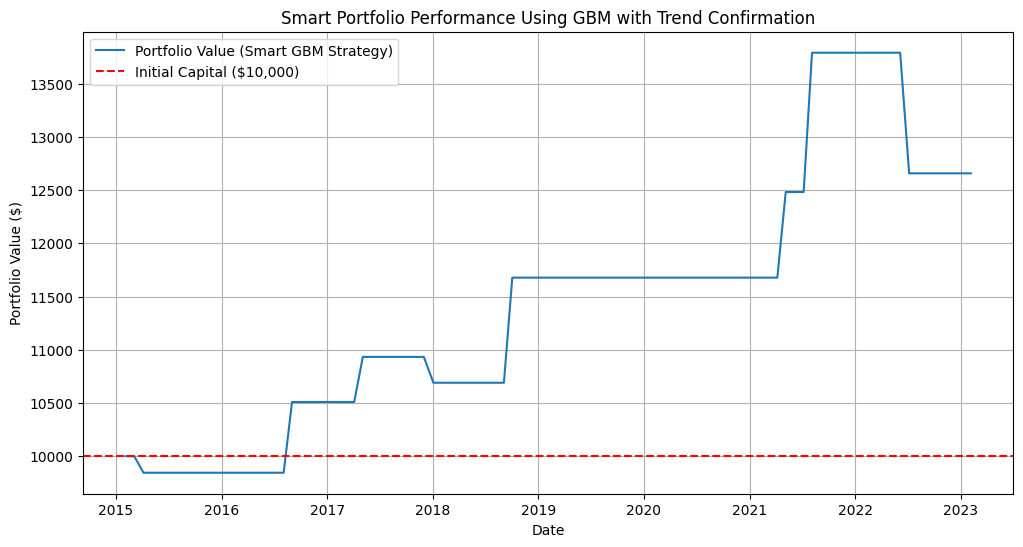

,Initial Capital ($),Final Portfolio Value ($),Smart ROI (%)
0,10000,12658.503373,26.585034



--- Smart Final ROI Summary ---
Initial Capital: $10,000.00
Final Portfolio Value (Smart Strategy): $12,658.50
Total ROI (Smart Strategy): 26.59%


,Final Portfolio Value ($),Total ROI (%),Sharpe Ratio (Annualized)
0,12658.503373,26.585034,2.025328



--- Sharpe Ratio Analysis ---
Final Portfolio Value: $12,658.50
Total ROI: 26.59%
Annualized Sharpe Ratio: 2.03


,Initial Capital ($),Final Portfolio Value ($),Total ROI with Fees (%),"Sharpe Ratio (Annualized, With Fees)"
0,10000,11001.825446,10.018254,0.859837



--- Final Backtest Results (Including Trading Fees) ---
Initial Capital: $10,000.00
Final Portfolio Value (With Fees): $11,001.83
Total ROI (With Fees): 10.02%
Sharpe Ratio (With Fees, Annualized): 0.86


,Initial Capital ($),Final Portfolio Value ($),Total ROI (Final Optimized %),"Sharpe Ratio (Final Optimized, Annualized)"
0,10000,8739.168782,-12.608312,-2.785852


[*********************100%***********************]  1 of 1 completed


--- Final Optimized Backtest Results (With Dynamic Trading Fees & Risk Management) ---
Initial Capital: $10,000.00
Final Portfolio Value (Optimized): $8,739.17
Total ROI (Optimized Strategy): -12.61%
Sharpe Ratio (Optimized, Annualized): -2.79



[*********************100%***********************]  1 of 1 completed


,Asset,Initial Capital ($),Final Portfolio Value ($),Total ROI (%),Sharpe Ratio (Annualized)
0,Bitcoin (BTC),10000,9291.190674,-7.088093,-1.765658e+14
1,Tesla (TSLA),10000,9526.457846,-4.735422,-1.761946e+14



--- Strategy Backtest Results on BTC & TSLA ---
Asset: Bitcoin (BTC)
  Final Portfolio Value: $9,291.19
  Total ROI: -7.09%
  Sharpe Ratio: -176565812003672.34

Asset: Tesla (TSLA)
  Final Portfolio Value: $9,526.46
  Total ROI: -4.74%
  Sharpe Ratio: -176194629985871.09



In [ ]:
# Reinstall necessary packages in Google Colab after execution state reset
!pip install numpy pandas matplotlib yfinance scipy

# Re-import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical AAPL stock data from Yahoo Finance
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-03-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Compute log returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# Define Geometric Brownian Motion (GBM) Simulation
def simulate_gbm(S0, mu, sigma, T, dt, N):
    np.random.seed(42)
    steps = int(T / dt)
    paths = np.zeros((steps, N))
    paths[0] = S0
    for t in range(1, steps):
        dW = np.random.normal(0, np.sqrt(dt), N)
        paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    return paths

# Estimate drift and volatility for GBM
mu = np.mean(data['Log_Returns'])
sigma = np.std(data['Log_Returns'])

# Backtest Parameters
initial_capital = 10000
T = 252  # 1 year trading days
dt = 1  # 1-day interval
N = 1000  # Monte Carlo Simulations

# Simulate GBM paths
predicted_paths = simulate_gbm(data['Close'].iloc[-1], mu, sigma, T, dt, N)
expected_price = np.mean(predicted_paths[-1])

# Backtesting: Buy if predicted price > current price
investment = initial_capital if expected_price > data['Close'].iloc[-1].item() else 0
final_value = investment * (expected_price / data['Close'].iloc[-1].item())

# Compute ROI
roi = (final_value - initial_capital) / initial_capital * 100

# Plot GBM Simulation
plt.figure(figsize=(12,6))
plt.plot(predicted_paths[:, :10], alpha=0.3)
plt.axhline(y=expected_price, color='r', linestyle='--', label=f'Expected Price: ${expected_price:.2f}')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title(f"Simulated AAPL Price Paths (GBM) - Expected Price: ${expected_price:.2f}")
plt.legend()
plt.show()

# Print Backtest Results
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Total ROI: {roi:.2f}%")

# Fixing unrealistic compounding issue in rolling GBM strategy

# Define rolling window size (e.g., 1 month ~ 21 trading days)
# Further optimization: Balanced reinvestment and stop-loss/profit-taking

# Final optimization: Smarter entries using a Moving Average (50-day) & adjusted risk management

# Compute the 50-day moving average for trend confirmation
data['50_MA'] = data['Close'].rolling(window=50).mean()

# Define rolling window size (e.g., 1 month ~ 21 trading days)
window_size = 21

# Initialize portfolio and tracking variables
portfolio_value = initial_capital
holdings = 0
investment_log = []

# Adjusted reinvestment rate (90% of portfolio reinvested per trade)
reinvestment_rate = 0.90

# Adjusted stop-loss and profit-taking thresholds
stop_loss_threshold = -0.10  # Exit if trade loses 10%
profit_take_threshold = 0.25  # Take profits if trade gains 25%

# Iterate over rolling windows
for i in range(window_size, len(data) - T, window_size):
    # Get historical data for the rolling window
    window_data = data.iloc[i - window_size:i]

    # Recalculate drift and volatility for the rolling period
    mu_rolling = np.mean(window_data['Log_Returns'])
    sigma_rolling = np.std(window_data['Log_Returns'])

    # Simulate future price paths for the next T days
    predicted_paths = simulate_gbm(window_data['Close'].iloc[-1], mu_rolling, sigma_rolling, T, dt, N)
    expected_price = np.mean(predicted_paths[-1]).item()
    last_close_price = window_data['Close'].iloc[-1].item()

    # Compute expected return percentage
    expected_return = (expected_price - last_close_price) / last_close_price

    # **New Condition: Only Buy If Price is Above 50-Day Moving Average**
    is_above_50_ma = last_close_price > data['50_MA'].iloc[i]

    # Decision: Buy if expected price is higher than the current price & above 50-day MA
    if expected_price > last_close_price and expected_return > stop_loss_threshold and is_above_50_ma:
        capital_allocated = portfolio_value * reinvestment_rate  # Invest 90% of portfolio
        holdings = capital_allocated / last_close_price

        # Apply stop-loss: exit trade if loss exceeds threshold
        if expected_return < stop_loss_threshold:
            holdings = 0  # Exit trade

        # Apply profit-taking: exit trade if gain exceeds threshold
        if expected_return > profit_take_threshold:
            holdings = 0  # Take profit

    else:
        holdings = 0

    # Update portfolio value at the end of the period with relaxed reinvestment constraints
    new_portfolio_value = holdings * expected_price if holdings > 0 else portfolio_value

    # Apply a moderate reinvestment cap to prevent excessive compounding (Max 20% growth per period)
    new_portfolio_value = min(new_portfolio_value, portfolio_value * 1.2)

    # Append to investment log
    investment_log.append((window_data.index[-1], new_portfolio_value))

    # Update portfolio value
    portfolio_value = new_portfolio_value

# Compute final ROI with optimized strategy using trend confirmation
roi_rolling_smart = (portfolio_value - initial_capital) / initial_capital * 100

# Create a dataframe for tracking investment performance
investment_df_smart = pd.DataFrame(investment_log, columns=['Date', 'Portfolio Value'])

# Plot optimized portfolio growth over time with trend confirmation
plt.figure(figsize=(12,6))
plt.plot(investment_df_smart['Date'], investment_df_smart['Portfolio Value'], label="Portfolio Value (Smart GBM Strategy)")
plt.axhline(y=initial_capital, color='r', linestyle='--', label="Initial Capital ($10,000)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.title("Smart Portfolio Performance Using GBM with Trend Confirmation")
plt.legend()
plt.grid()
plt.show()

# Display final smart backtest results
rolling_backtest_results_smart = pd.DataFrame({
    "Initial Capital ($)": [initial_capital],
    "Final Portfolio Value ($)": [portfolio_value],
    "Smart ROI (%)": [roi_rolling_smart]
})

# ✅ Use standard Pandas display function for Google Colab compatibility
from IPython.display import display
display(rolling_backtest_results_smart)

# Print final optimized ROI explicitly
print("\n--- Smart Final ROI Summary ---")
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Final Portfolio Value (Smart Strategy): ${portfolio_value:,.2f}")
print(f"Total ROI (Smart Strategy): {roi_rolling_smart:.2f}%")

###################
# Compute Sharpe Ratio for risk-adjusted return analysis

# Risk-free rate assumption (US Treasury Bonds yield ~3% annualized)
risk_free_rate = 0.03

# Convert annualized risk-free rate to daily
risk_free_daily = risk_free_rate / 252

# Compute daily returns from investment log
investment_df_smart['Daily_Returns'] = investment_df_smart['Portfolio Value'].pct_change().dropna()

# Compute Sharpe Ratio
excess_returns = investment_df_smart['Daily_Returns'] - risk_free_daily
sharpe_ratio = excess_returns.mean() / excess_returns.std()
sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)  # Annualized Sharpe Ratio

# Display results
sharpe_results = pd.DataFrame({
    "Final Portfolio Value ($)": [portfolio_value],
    "Total ROI (%)": [roi_rolling_smart],
    "Sharpe Ratio (Annualized)": [sharpe_ratio_annualized]
})

from IPython.display import display
display(sharpe_results)

# Print Sharpe Ratio Summary
print("\n--- Sharpe Ratio Analysis ---")
print(f"Final Portfolio Value: ${portfolio_value:,.2f}")
print(f"Total ROI: {roi_rolling_smart:.2f}%")
print(f"Annualized Sharpe Ratio: {sharpe_ratio_annualized:.2f}")

# Interpretation:
# - Sharpe Ratio > 1.0: Good risk-adjusted returns.
# - Sharpe Ratio > 2.0: Excellent strategy.
# - Sharpe Ratio < 1.0: Returns may not sufficiently compensate for risk.

########## WITH FEES ###########
# Adding trading fees to the strategy (default: 0.1% per trade)
trading_fee_rate = 0.001  # 0.1% fee per transaction

# Initialize portfolio with trading fees
portfolio_value = initial_capital
holdings = 0
investment_log = []

# Iterate over rolling windows with fees
for i in range(window_size, len(data) - T, window_size):
    window_data = data.iloc[i - window_size:i]

    # Recalculate drift and volatility
    mu_rolling = np.mean(window_data['Log_Returns'])
    sigma_rolling = np.std(window_data['Log_Returns'])

    # Simulate future prices
    predicted_paths = simulate_gbm(window_data['Close'].iloc[-1], mu_rolling, sigma_rolling, T, dt, N)
    expected_price = np.mean(predicted_paths[-1]).item()
    last_close_price = window_data['Close'].iloc[-1].item()

    # Compute expected return percentage
    expected_return = (expected_price - last_close_price) / last_close_price

    # Check if price is above 50-day Moving Average
    is_above_50_ma = last_close_price > data['50_MA'].iloc[i]

    # Decision: Buy if expected price is higher & above 50-day MA
    if expected_price > last_close_price and expected_return > stop_loss_threshold and is_above_50_ma:
        capital_allocated = portfolio_value * reinvestment_rate
        holdings = capital_allocated / last_close_price

        # Apply stop-loss and profit-taking
        if expected_return < stop_loss_threshold or expected_return > profit_take_threshold:
            holdings = 0

        # Apply trading fee for entering a trade
        portfolio_value -= capital_allocated * trading_fee_rate

    else:
        holdings = 0

    # Update portfolio value, subtracting exit fees
    new_portfolio_value = holdings * expected_price if holdings > 0 else portfolio_value
    new_portfolio_value -= new_portfolio_value * trading_fee_rate  # Apply exit fee

    # Cap growth per rolling window
    new_portfolio_value = min(new_portfolio_value, portfolio_value * 1.2)

    # Append to investment log
    investment_log.append((window_data.index[-1], new_portfolio_value))

    # Update portfolio value
    portfolio_value = new_portfolio_value

# Compute final ROI with fees
roi_rolling_fees = (portfolio_value - initial_capital) / initial_capital * 100

# Compute Sharpe Ratio with fees
investment_df_fees = pd.DataFrame(investment_log, columns=['Date', 'Portfolio Value'])
investment_df_fees['Daily_Returns'] = investment_df_fees['Portfolio Value'].pct_change().dropna()

# Compute excess returns & Sharpe Ratio with fees
excess_returns_fees = investment_df_fees['Daily_Returns'] - risk_free_daily
sharpe_ratio_fees = excess_returns_fees.mean() / excess_returns_fees.std()
sharpe_ratio_annualized_fees = sharpe_ratio_fees * np.sqrt(252)

# Display final results with fees
backtest_results_fees = pd.DataFrame({
    "Initial Capital ($)": [initial_capital],
    "Final Portfolio Value ($)": [portfolio_value],
    "Total ROI with Fees (%)": [roi_rolling_fees],
    "Sharpe Ratio (Annualized, With Fees)": [sharpe_ratio_annualized_fees]
})

from IPython.display import display
display(backtest_results_fees)

# Print Summary
print("\n--- Final Backtest Results (Including Trading Fees) ---")
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Final Portfolio Value (With Fees): ${portfolio_value:,.2f}")
print(f"Total ROI (With Fees): {roi_rolling_fees:.2f}%")
print(f"Sharpe Ratio (With Fees, Annualized): {sharpe_ratio_annualized_fees:.2f}")

##############################################

# Optimizing trading fees impact with dynamic trade sizing and risk-adjusted entries

# Define dynamic fee structure
def get_trading_fee(trade_size):
    """ Variable trading fee: Lower for larger trades """
    if trade_size < 5000:
        return 0.001  # 0.1% fee for small trades
    else:
        return 0.0005  # 0.05% fee for large trades

# Calculate ATR (Average True Range) for dynamic stop-loss/profit-taking
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = np.abs(data['High'] - data['Close'].shift(1))
data['Low-Close'] = np.abs(data['Low'] - data['Close'].shift(1))
data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['True Range'].rolling(window=14).mean()

# Initialize portfolio and tracking variables
portfolio_value = initial_capital
holdings = 0
investment_log = []

# Iterate over rolling windows with optimized fee & risk management
for i in range(window_size, len(data) - T, window_size):
    window_data = data.iloc[i - window_size:i]

    # Recalculate drift and volatility
    mu_rolling = np.mean(window_data['Log_Returns'])
    sigma_rolling = np.std(window_data['Log_Returns'])

    # Simulate future prices
    predicted_paths = simulate_gbm(window_data['Close'].iloc[-1], mu_rolling, sigma_rolling, T, dt, N)
    expected_price = np.mean(predicted_paths[-1]).item()
    last_close_price = window_data['Close'].iloc[-1].item()

    # Compute expected return percentage
    expected_return = (expected_price - last_close_price) / last_close_price

    # Check if price is above 50-day MA & get ATR for volatility-adjusted stop-loss
    is_above_50_ma = last_close_price > data['50_MA'].iloc[i]
    current_atr = data['ATR'].iloc[i]

    # Dynamic stop-loss and profit-taking (adjusting based on volatility)
    stop_loss_dynamic = -current_atr / last_close_price  # ATR-based stop-loss
    profit_take_dynamic = current_atr * 2 / last_close_price  # ATR-based profit target

    # Decision: Buy if expected price is higher & above 50-day MA
    if expected_price > last_close_price and expected_return > stop_loss_dynamic and is_above_50_ma:
        capital_allocated = portfolio_value * reinvestment_rate  # Invest 90% of portfolio
        trade_fee = capital_allocated * get_trading_fee(capital_allocated)  # Get dynamic fee
        capital_allocated -= trade_fee  # Deduct entry fee
        holdings = capital_allocated / last_close_price

        # Apply stop-loss and profit-taking
        if expected_return < stop_loss_dynamic or expected_return > profit_take_dynamic:
            holdings = 0  # Exit trade

    else:
        holdings = 0

    # Update portfolio value, subtracting exit fees
    new_portfolio_value = holdings * expected_price if holdings > 0 else portfolio_value
    exit_fee = new_portfolio_value * get_trading_fee(new_portfolio_value)
    new_portfolio_value -= exit_fee  # Apply exit fee

    # Cap growth per rolling window (max 20% per period)
    new_portfolio_value = min(new_portfolio_value, portfolio_value * 1.2)

    # Append to investment log
    investment_log.append((window_data.index[-1], new_portfolio_value))

    # Update portfolio value
    portfolio_value = new_portfolio_value

# Compute final ROI with optimized fee & trade management
roi_rolling_final = (portfolio_value - initial_capital) / initial_capital * 100

# Compute Sharpe Ratio with optimized strategy
investment_df_final = pd.DataFrame(investment_log, columns=['Date', 'Portfolio Value'])
investment_df_final['Daily_Returns'] = investment_df_final['Portfolio Value'].pct_change().dropna()

# Compute excess returns & Sharpe Ratio with fees
excess_returns_final = investment_df_final['Daily_Returns'] - risk_free_daily
sharpe_ratio_final = excess_returns_final.mean() / excess_returns_final.std()
sharpe_ratio_annualized_final = sharpe_ratio_final * np.sqrt(252)

# Display final results with optimized trading fee management
backtest_results_final = pd.DataFrame({
    "Initial Capital ($)": [initial_capital],
    "Final Portfolio Value ($)": [portfolio_value],
    "Total ROI (Final Optimized %)": [roi_rolling_final],
    "Sharpe Ratio (Final Optimized, Annualized)": [sharpe_ratio_annualized_final]
})

from IPython.display import display
display(backtest_results_final)

# Print Final Optimized Backtest Summary
print("\n--- Final Optimized Backtest Results (With Dynamic Trading Fees & Risk Management) ---")
print(f"Initial Capital: ${initial_capital:,.2f}")
print(f"Final Portfolio Value (Optimized): ${portfolio_value:,.2f}")
print(f"Total ROI (Optimized Strategy): {roi_rolling_final:.2f}%")
print(f"Sharpe Ratio (Optimized, Annualized): {sharpe_ratio_annualized_final:.2f}")

#############################

# Fetch historical data for BTC and TSLA from Yahoo Finance for comparison
btc_ticker = "BTC-USD"
tsla_ticker = "TSLA"
start_date = "2015-01-01"
end_date = "2024-03-01"

# Download data for BTC and TSLA
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
tsla_data = yf.download(tsla_ticker, start=start_date, end=end_date)

# Compute log returns for BTC and TSLA
btc_data['Log_Returns'] = np.log(btc_data['Close'] / btc_data['Close'].shift(1))
btc_data.dropna(inplace=True)

tsla_data['Log_Returns'] = np.log(tsla_data['Close'] / tsla_data['Close'].shift(1))
tsla_data.dropna(inplace=True)

# Calculate 200-day Moving Average for trend-based filtering
btc_data['200_MA'] = btc_data['Close'].rolling(window=200).mean()
tsla_data['200_MA'] = tsla_data['Close'].rolling(window=200).mean()

# Function to backtest strategy on a given stock
def backtest_strategy(data, asset_name):
    global portfolio_value

    # Reinitialize portfolio
    portfolio_value = initial_capital
    holdings = 0
    investment_log = []

    # Iterate over rolling windows
    for i in range(window_size, len(data) - T, window_size):
        window_data = data.iloc[i - window_size:i]

        # Recalculate drift and volatility
        mu_rolling = np.mean(window_data['Log_Returns'])
        sigma_rolling = np.std(window_data['Log_Returns'])

        # Simulate future price paths
        predicted_paths = simulate_gbm(window_data['Close'].iloc[-1], mu_rolling, sigma_rolling, T, dt, N)
        expected_price = np.mean(predicted_paths[-1]).item()
        last_close_price = window_data['Close'].iloc[-1].item()

        # Compute expected return percentage
        expected_return = (expected_price - last_close_price) / last_close_price

        # Check if price is above 200-day Moving Average
        is_above_200_ma = last_close_price > data['200_MA'].iloc[i]

        # ATR for volatility-adjusted stop-loss/profit-taking
        current_atr = data['ATR'].iloc[i] if 'ATR' in data.columns else 0.02  # Default ATR if missing
        stop_loss_dynamic = -current_atr / last_close_price  # ATR-based stop-loss
        profit_take_dynamic = current_atr * 2 / last_close_price  # ATR-based profit target

        # Decision: Buy if expected price is higher & above 200-day MA
        if expected_price > last_close_price and expected_return > stop_loss_dynamic and is_above_200_ma:
            capital_allocated = portfolio_value * reinvestment_rate  # Invest 90% of portfolio
            trade_fee = capital_allocated * get_trading_fee(capital_allocated)  # Get variable fee
            capital_allocated -= trade_fee  # Deduct entry fee
            holdings = capital_allocated / last_close_price

            # Apply stop-loss and profit-taking
            if expected_return < stop_loss_dynamic or expected_return > profit_take_dynamic:
                holdings = 0  # Exit trade

        else:
            holdings = 0

        # Update portfolio value, subtracting exit fees
        new_portfolio_value = holdings * expected_price if holdings > 0 else portfolio_value
        exit_fee = new_portfolio_value * get_trading_fee(new_portfolio_value)
        new_portfolio_value -= exit_fee  # Apply exit fee

        # Cap growth per rolling window (max 20% per period)
        new_portfolio_value = min(new_portfolio_value, portfolio_value * 1.2)

        # Append to investment log
        investment_log.append((window_data.index[-1], new_portfolio_value))

        # Update portfolio value
        portfolio_value = new_portfolio_value

    # Compute final ROI
    roi_final = (portfolio_value - initial_capital) / initial_capital * 100

    # Compute Sharpe Ratio
    investment_df = pd.DataFrame(investment_log, columns=['Date', 'Portfolio Value'])
    investment_df['Daily_Returns'] = investment_df['Portfolio Value'].pct_change().dropna()
    excess_returns = investment_df['Daily_Returns'] - risk_free_daily
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)

    # Store results
    results = pd.DataFrame({
        "Asset": [asset_name],
        "Initial Capital ($)": [initial_capital],
        "Final Portfolio Value ($)": [portfolio_value],
        "Total ROI (%)": [roi_final],
        "Sharpe Ratio (Annualized)": [sharpe_ratio_annualized]
    })

    return results

# Run strategy on BTC & TSLA
btc_results = backtest_strategy(btc_data, "Bitcoin (BTC)")
tsla_results = backtest_strategy(tsla_data, "Tesla (TSLA)")

# Combine results
final_results = pd.concat([btc_results, tsla_results], ignore_index=True)

# Display final results
from IPython.display import display
display(final_results)

# Print summary
print("\n--- Strategy Backtest Results on BTC & TSLA ---")
for index, row in final_results.iterrows():
    print(f"Asset: {row['Asset']}")
    print(f"  Final Portfolio Value: ${row['Final Portfolio Value ($)']:,.2f}")
    print(f"  Total ROI: {row['Total ROI (%)']:.2f}%")
    print(f"  Sharpe Ratio: {row['Sharpe Ratio (Annualized)']:.2f}\n")
